# Ensemble learning - Zadanie 3

EDA - Rekrutacja na studia ("Placement_Data_Full_Class.csv") Wykonaj analizę danych i odpowiedz na poniższe pytania:

1. Który czynnik decyduje o przyjęciu kandydata na studia?
2. Czy procenty uzyskane w testach (zmienne *_p) wpływają w jakimś stopniu na to, czy kandydat zostanie przyjęty?
3. Jaka specjalizacja jest najbardziej pożądana przez firmy?
4. Przeprowadź wszelkiego rodzaju analizy i testy statystyczne - wedle uznania

In [1]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#wczytanie danych
df=pd.read_csv("Placement_Data_Full_Class.csv", index_col=0)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [3]:
## Column headers
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

##### What column name refers to/Do czego odnosi się nazwa kolumny
ssc_p:- Secondary Education(%) 10th Grade / Wykształcenie średnie (%) 10. klasa

ssc_b:- 10th Board of Education / 10. Kuratorium Oświaty

hsc_p:- Higher Secondary Education(%) 12th Grade / Wykształcenie wyższe średnie (%) 12. klasa

hsc_b:- 12th Board of Education / 12. Kuratorium Oświaty

hsc_s:- Specialization in Higher Secondary Education / Specjalizacja w szkolnictwie wyższym średnim

degree_p:- Undergraduate (%) / Licencjat (%)

degree_t:- Undergraduate degree type / Rodzaj studiów licencjackich

workex:- Work experience / Doświadczenie zawodowe

etest_p:- Placement test (%) / Test kwalifikacyjny (%)

specialisation:- MBA specialisation / Specjalizacja MBA

mba_p:- MBA (%) / MBA (%)

status:- Hiring status / Stan zatrudnienia

In [4]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [5]:
df.shape

(215, 14)

In [6]:
# Detect missing values.
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
## Check detail description about numeric variables 
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
## Check data type and shape of every column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


# Explanatory Data Analysis
### Plot histogram for all numeric variables

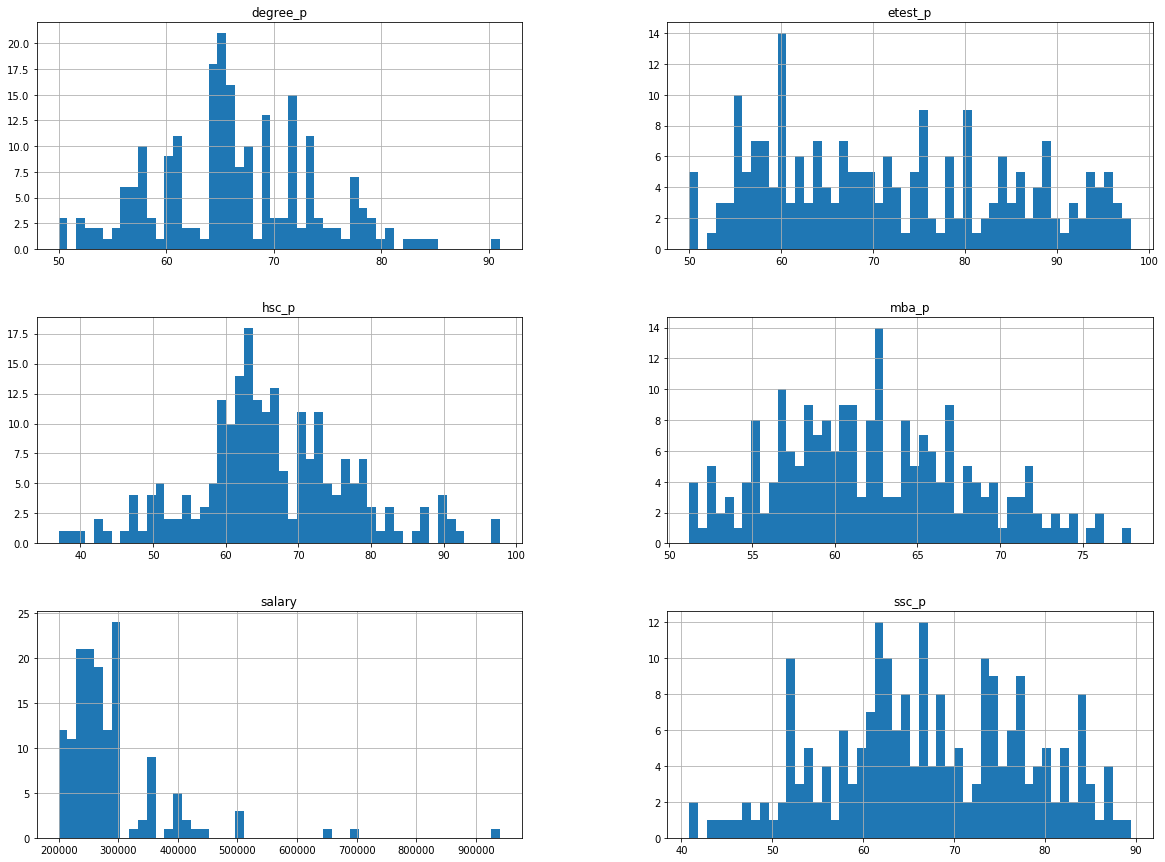

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Find marginal probability through two way table / Znajdź marginalne prawdopodobieństwo poprzez tabelę dwukierunkową
Marginal Probability is the probability of the occurence of the single event / Prawdopodobieństwo krańcowe to prawdopodobieństwo wystąpienia pojedynczego zdarzenia

# 1. Który czynnik decyduje o przyjęciu kandydata na studia?
Do powyższej analizy jako zmienne objaśniające wybrano zmienne: gender, ssc_b, hsc_b, hsc_s, natomiast zmienną objaśnianą jest tutaj, zmienna: status. Obliczamy to na podstawie prostej tabelii krzyżowej dwóch (lub więcej) czynników. Domyślnie obliczamy tabelę częstości występowania danych współczynników.

In [10]:
pd.crosstab(index = df['gender'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
gender,,,
F,0.130233,0.223256,0.353488
M,0.181395,0.465116,0.646512
All,0.311628,0.688372,1.000000


Znikome prawdopodobieństwo pokazuje, że na 65% kandydatów, 46% pułci męskiej zostaje przyjętych, a kobiet z 35% tylko 22% zostaje przyjętych, co oznacza, że wskaźnik sukcesu MBA u mężczyzn jest wyższy niż u kobiet.

In [11]:
pd.crosstab(index = df['ssc_b'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
ssc_b,,,
Central,0.176744,0.362791,0.539535
Others,0.134884,0.325581,0.460465
All,0.311628,0.688372,1.000000


Znikome prawdopodobieństwo pokazuje, że na 54% kandydatów z Centralnego Kuratorium Oświaty, 36% zostaje przyjętych, a z innych na 46%, 32% zostaje przyjętych, co oznacza, że wskaźnik sukcesu MBA w Centralnym Kuratorium Oświaty jest wyższy niż w innych Kuratoriach Oświaty.

In [12]:
pd.crosstab(index = df['hsc_b'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
hsc_b,,,
Central,0.125581,0.265116,0.390698
Others,0.186047,0.423256,0.609302
All,0.311628,0.688372,1.000000


Znikome prawdopodobieństwo pokazuje w innym regionie badanym. Całkowicie odwrotne dane, niż wcześniejsze prawdopodobieństwo. Na 61% kandydatów x Innych Okręgów Oświaty, 42% zostaje przyjętych. A z Centralnego na 39% tylko 26% zostaje przyjętych. Co oznacza, że wskaźnik sukcesu MBA w Innych Kuratoriach Oświaty jest wyższy niż w Centralnym Kuratorium Oświaty. Przez co możemy wnioskować, że na studiach, możemy się spodziewać około połowy kandydatów z CKO i około 50% z IKO.

In [13]:
pd.crosstab(index = df['hsc_s'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
hsc_s,,,
Arts,0.023256,0.027907,0.051163
Commerce,0.158140,0.367442,0.525581
Science,0.130233,0.293023,0.423256
All,0.311628,0.688372,1.000000


Kandydaci handlowi oraz kandydaci nauki i technologii zdobywają równomiernie pozycje w firmach. Kandydaci handlowi mają, taki sam sotsunek do uzyskania miejsca co kandydaci nauki i technologii. Im większa liczba absolwentów, tym większy odsetek zatrudnionych w handlu i naukach ścisłych.

##### Powyższe czynniki mają wpływ na przyjęcie kandydata na stidia, poniższe również.

In [14]:
## Marginal Probability beteween categorical variables status & specialisation
pd.crosstab(index = df['specialisation'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
specialisation,,,
Mkt&Fin,0.116279,0.441860,0.55814
Mkt&HR,0.195349,0.246512,0.44186
All,0.311628,0.688372,1.00000


Znikome prawdopodobieństwo pokazuje, że na 56% kandydatów na stanowisko Finanse 44% zostaje przyjętych, a w HR z 44% tylko 24% zostaje przyjętych, co oznacza, że wskaźnik sukcesu MBA w specjalizacji Finanse jest wyższy niż HR. Znalezienie doświadczenia zawodowego jest jednym z czynników sukcesu kandydata na finanse.

In [15]:
## Marginal Probability beteween categorical variables status & specialisation
pd.crosstab(index = df['specialisation'], columns=df['workex'], margins =True, normalize = 'columns')

workex,No,Yes,All
specialisation,,,
Mkt&Fin,0.489362,0.689189,0.55814
Mkt&HR,0.510638,0.310811,0.44186


Powyższa tabela prawdopodobieństwa marży pokazuje, że doświadczenie zawodowe odgrywa ważną rolę w sukcesie kandydata na studia MBA Finance.

In [16]:
## Marginal Probability beteween categorical variables status & workexperience (workex)
pd.crosstab(index = df['status'], columns=df['workex'], margins =True, normalize = 'columns')

workex,No,Yes,All
status,,,
Not Placed,0.404255,0.135135,0.311628
Placed,0.595745,0.864865,0.688372


Zgodnie z danymi kampusowymi i powyżej trzema marginalnymi tabelami prawdopodobieństwa, lepiej jest znaleźć doświadczenie zawodowe. Oznacza to, że czynnik doświadczenia zawodowego wpłynął na kandydata w uzyskaniu miejsca, dlatego znalezienie się w firmie jest lepsze dla kandydata na MBA Finance.

In [17]:
## Marginal Probability beteween categorical variables status & specialisation
pd.crosstab(index = df['degree_t'], columns=df['status'], margins =True, normalize =True)

status,Not Placed,Placed,All
degree_t,,,
Comm&Mgmt,0.200000,0.474419,0.674419
Others,0.027907,0.023256,0.051163
Sci&Tech,0.083721,0.190698,0.274419
All,0.311628,0.688372,1.000000


Kandydaci handlowi zdobywają coraz więcej pozycji w firmach, ale są również bardziej liczni, ale kandydaci z dziedziny nauki i technologii mają najlepszy stosunek do uzyskania miejsca z innego rodzaju studiów licencjackich.
### Zgodnie z danymi dotyczącymi miejsc w college'u i powyżej, paragraf wyraźnie pokazuje, że procent ma znaczenie przy umieszczaniu studentów w kampusie XYZ.

# 2. Czy procenty uzyskane w testach (zmienne *_p) wpływają w jakimś stopniu na to, czy kandydat zostanie przyjęty?

Do powyższej analizy jako zmienne objaśniające wybrano zmienne: ssc_p, hsc_p, degree_p, etest_p, mba_p, natomiast zmienną objaśnianą jest tutaj, zmienna: status. Obliczamy to na podstawie prostej tabelii krzyżowej dwóch (lub więcej) czynników. Domyślnie obliczamy tabelę częstości występowania danych współczynników.

In [18]:
pd.crosstab(index = df['ssc_p'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
ssc_p,,,
40.89,0.004651,0.000000,0.004651
41.0,0.004651,0.000000,0.004651
43.0,0.004651,0.000000,0.004651
44.0,0.004651,0.000000,0.004651
45.0,0.004651,0.000000,0.004651
...,...,...,...
86.5,0.000000,0.004651,0.004651
87.0,0.000000,0.013953,0.013953
88.0,0.000000,0.004651,0.004651


In [19]:
pd.crosstab(index = df['hsc_p'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
hsc_p,,,
37.0,0.004651,0.000000,0.004651
39.0,0.004651,0.000000,0.004651
40.0,0.004651,0.000000,0.004651
42.0,0.004651,0.000000,0.004651
42.16,0.004651,0.000000,0.004651
...,...,...,...
91.0,0.000000,0.004651,0.004651
92.0,0.000000,0.004651,0.004651
97.0,0.000000,0.004651,0.004651


In [20]:
pd.crosstab(index = df['degree_p'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
degree_p,,,
50.0,0.004651,0.000000,0.004651
50.2,0.004651,0.000000,0.004651
50.8,0.004651,0.000000,0.004651
52.0,0.013953,0.000000,0.013953
53.0,0.009302,0.000000,0.009302
...,...,...,...
83.0,0.000000,0.004651,0.004651
84.0,0.000000,0.004651,0.004651
85.0,0.000000,0.004651,0.004651


In [21]:
pd.crosstab(index = df['etest_p'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
etest_p,,,
50.0,0.009302,0.004651,0.013953
50.48,0.000000,0.004651,0.004651
50.89,0.000000,0.004651,0.004651
52.0,0.000000,0.004651,0.004651
53.04,0.000000,0.004651,0.004651
...,...,...,...
96.8,0.000000,0.004651,0.004651
97.0,0.004651,0.004651,0.009302
97.4,0.000000,0.004651,0.004651


In [22]:
pd.crosstab(index = df['mba_p'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
mba_p,,,
51.21,0.004651,0.000000,0.004651
51.29,0.004651,0.000000,0.004651
51.45,0.004651,0.000000,0.004651
51.58,0.004651,0.000000,0.004651
52.21,0.004651,0.000000,0.004651
...,...,...,...
75.71,0.004651,0.000000,0.004651
76.18,0.000000,0.004651,0.004651
76.26,0.000000,0.004651,0.004651


#### Czy procenty uzyskane w testach (zmienne *_p) wpływają w jakimś stopniu na to, czy kandydat zostanie przyjęty? -> Procent uzyskany w testach (zmienne *_p) nie wpływa w zanaczącym stopniu na to, czy kandydat zostanie przyjęty!

# 3. Jaka specjalizacja jest najbardziej pożądana przez firmy?

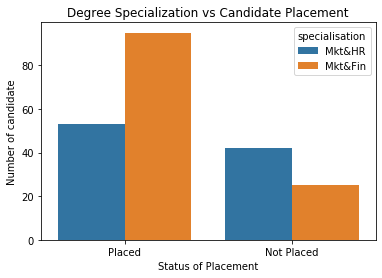

In [23]:
sns.countplot(x="status", data=df, hue='specialisation')
plt.title("Degree Specialization vs Candidate Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

### Powyższy wykres pokazuje, że w kampusie dominuje specjalizacja Mkt&Fin w zakresie stażu.

### Sprawdzenie korelacji procentowej w stopniach i ssc w odniesieniu do specjalizacji.

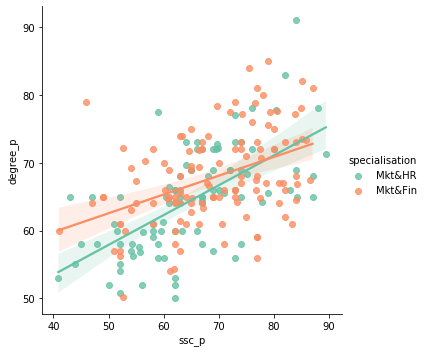

In [24]:
sns.lmplot(x='ssc_p', y='degree_p', data= df, hue ='specialisation', legend=True, palette="Set2")
plt.show()

### Czy doświadczenie zawodowe wpływa na umiejscowienie kandydata?

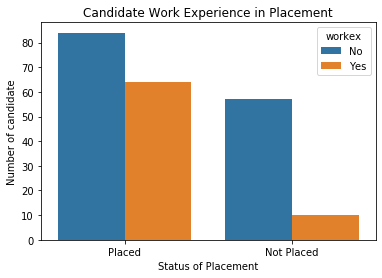

In [25]:
sns.countplot(x="status", data=df, hue='workex')
plt.title("Candidate Work Experience in Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

### Według danych większość kandydatów, którzy mają doświadczenie zawodowe, znajduje się w firmie. Oznacza to, że doświadczenie zawodowe jest ważnym czynnikiem w uzyskaniu stażu.

## Określenie, na którym poziomie technologia studiowana przez kandydata jest najbardziej pożądana

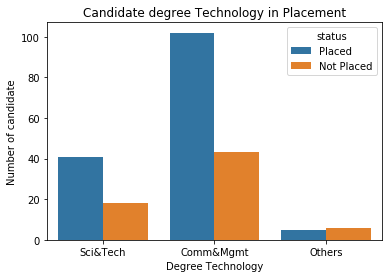

In [26]:
sns.countplot(x="degree_t", data=df, hue='status')
plt.title("Candidate degree Technology in Placement")
plt.xlabel("Degree Technology")
plt.ylabel("Number of candidate")
plt.show()

## Zależność między umiejscowieniem ucznia a jego wartością procentową.

Pairwise Plot :- Used to plot relationship in a dataset / Wykres parami: — używany do wykreślania relacji w zbiorze danych

Creates scatter plots for join relationship and histogram for univariate distributions / Tworzy wykresy punktowe dla relacji złączenia i histogram dla rozkładów jednowymiarowych

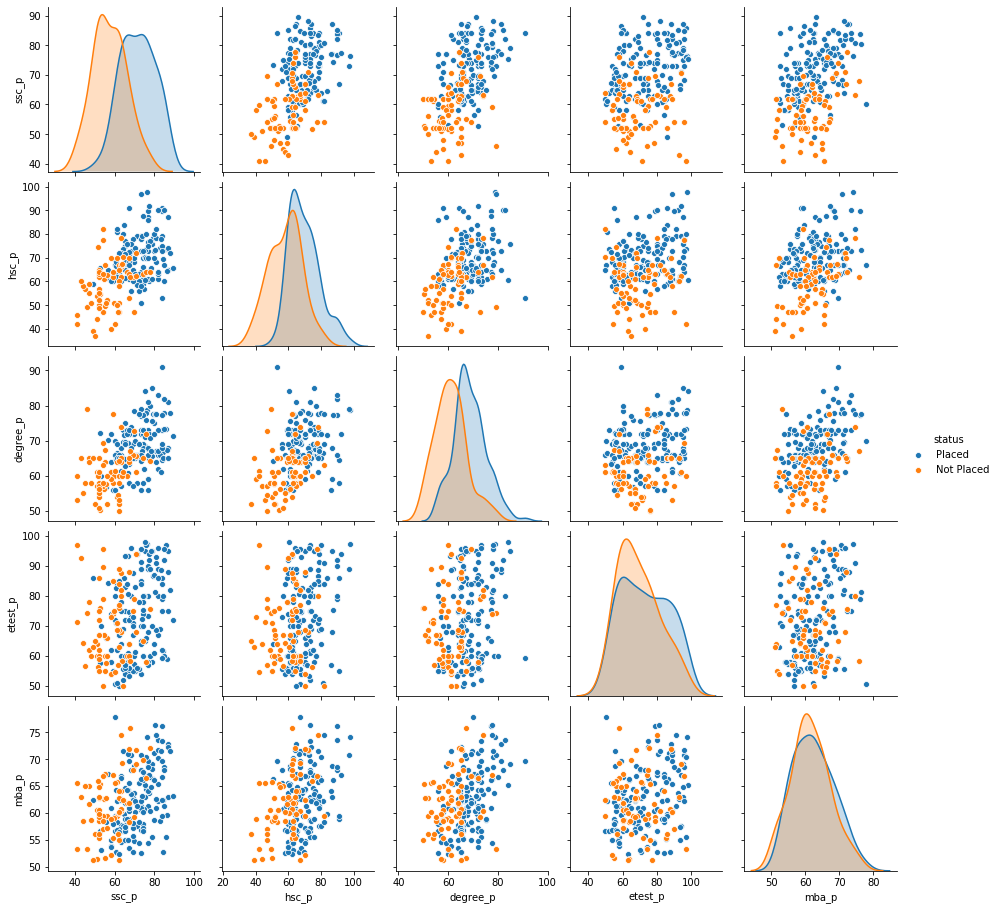

In [27]:
sns.pairplot(df.drop(["salary"], axis=1), kind="scatter", hue="status")
plt.show()

### Sprawdzenie średniej lub średniej zmiennej liczbowej pod kątem unikalnych wartości statusu

In [28]:
df.groupby(["status"]).mean()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


### Check how many students have been placed or not

In [29]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

## Create another dataframe of only placed students / Utworzenie kolejnej ramki danych tylko dla umieszczonych uczniów

In [30]:
## Create another dataframe of only placed students and check its shape 
df_placed = df.dropna(how="any")
df_placed.shape

(148, 14)

### Create sub dataset of only numeric data type variables

In [31]:
numeric_data = df_placed.select_dtypes(exclude = [object])
numeric_data.shape

(148, 6)

## Salary distribution through box-whiskers plot & Histogram

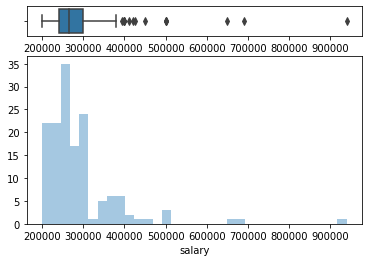

In [32]:
## Box whiskers plot & histogram on the same window 
## Split the plotting window into 2 parts

f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
## Add and create  box plot
sns.boxplot(df_placed["salary"], ax=ax_box)

sns.distplot(df_placed["salary"], ax=ax_hist, kde=False)
plt.show()

### Find correlation between numeric variables in dataframe
Correlation :- Calculate relationship between two numerical variables.

Excluding null valuees & excluding the categorical variables to find the Pearson's correlation

• Positive correlation – the other variable has a tendency to also increase

• Negative correlation – the other variable has a tendency to decrease

• No correlation – the other variable does not tend to either increase or decrease.

In [33]:
corr_matrix = numeric_data.corr()
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


Now, show the correlation matrix into heatmap for better understanding and visualization

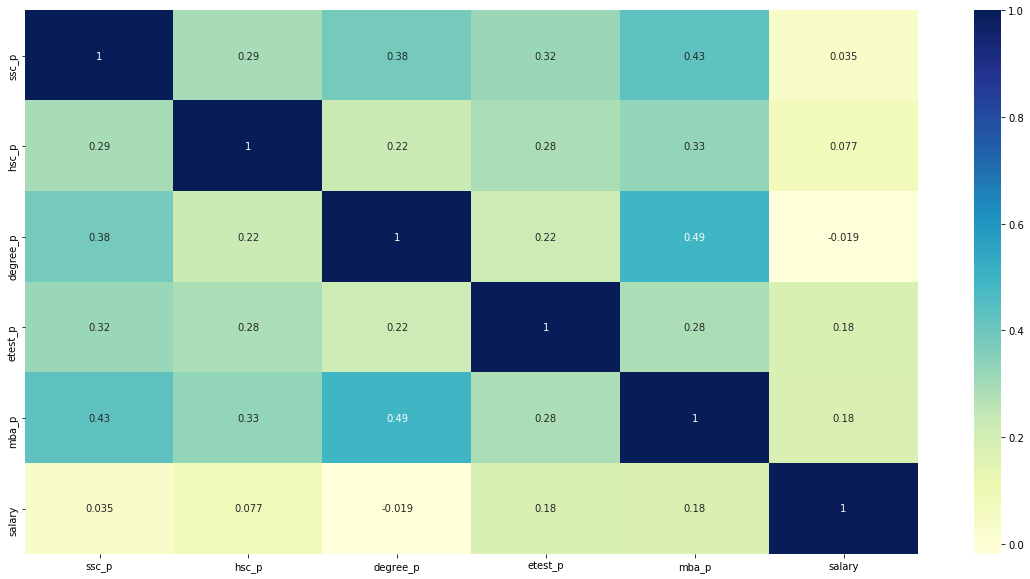

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

According to correlation matrix and its visualization in heatmaps, there is almost -ve correlation between undergraduate(%) and salary. The salary variable only shows (+ve) correlation with MBA(%) & placement test(%) . And maximum positive coorelation will be shown between undergraduate(%) and MBA(%).

In the heatmap of correlation matrix the darker the color of tile the correlation between the variables is highly positive.And lighter the color of tile the correlation between the variables is highly negative.

In [35]:
# Variance Infilation Factor 
X = numeric_data.drop(columns=['salary','mba_p',], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   features  vif_factor
0     ssc_p   84.047282
1     hsc_p   59.557172
2  degree_p   88.344621
3   etest_p   34.485071


## Find does gender of an student affects the salary or any other variable

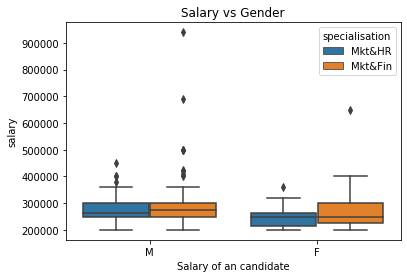

In [36]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variable.

sns.boxplot(x=df_placed['gender'], y = df_placed['salary'], hue='specialisation', data=df_placed)
plt.title("Salary vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Salary of an candidate")
plt.show()

According to above box-whiskers plot the outliners or extreme value in salary column lie more in male category than female. One of assumptions is may be some of the male candidates getting hire for higher post in a company thats why they are getting more salary.

## Pairplot of gender variable

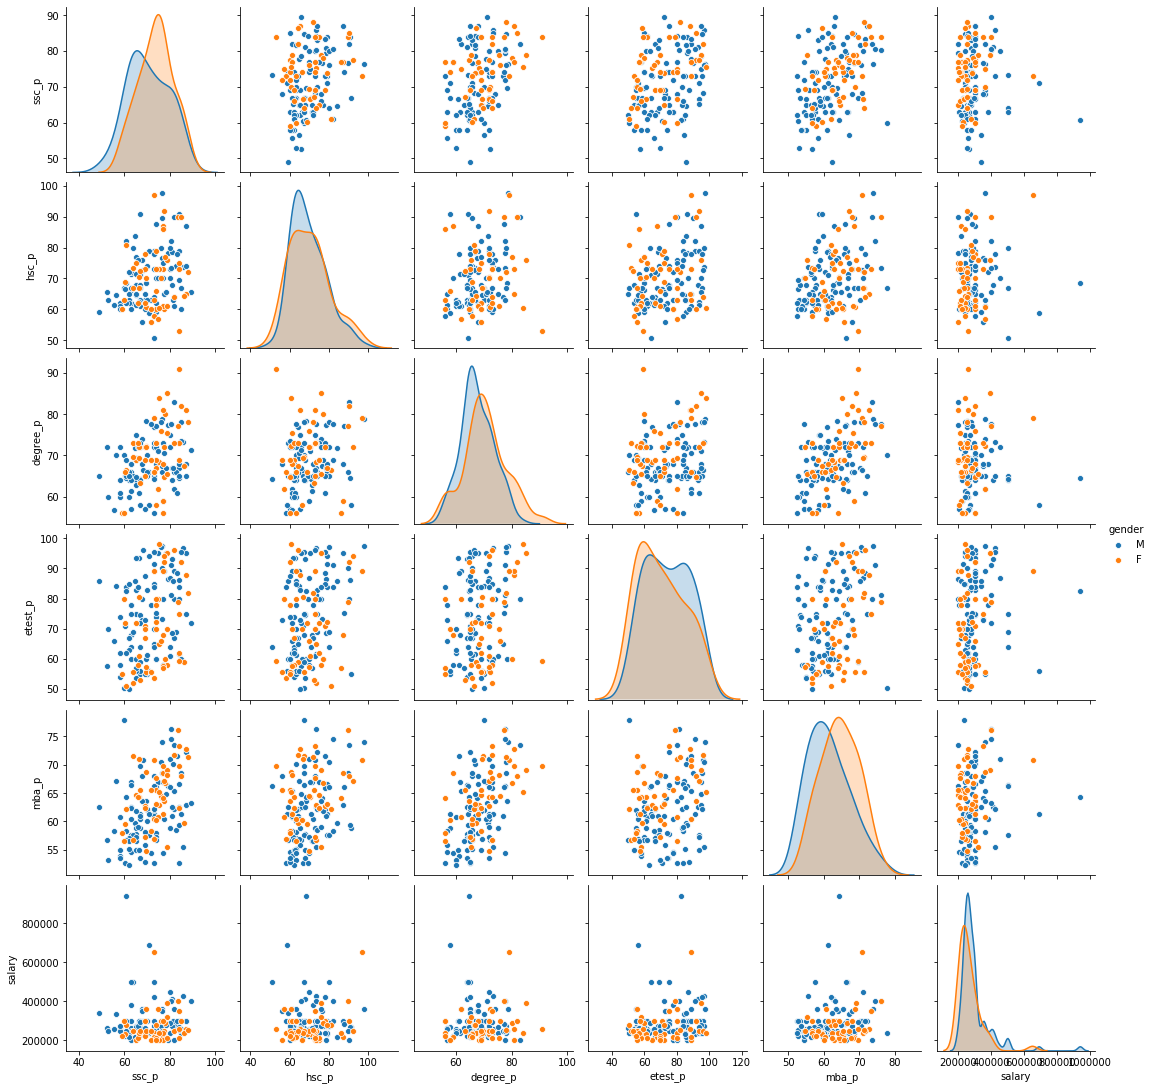

In [37]:
sns.pairplot(df_placed, kind="scatter", hue="gender")
plt.show()

## Find relationship between degree specialization and other variables of placed student.

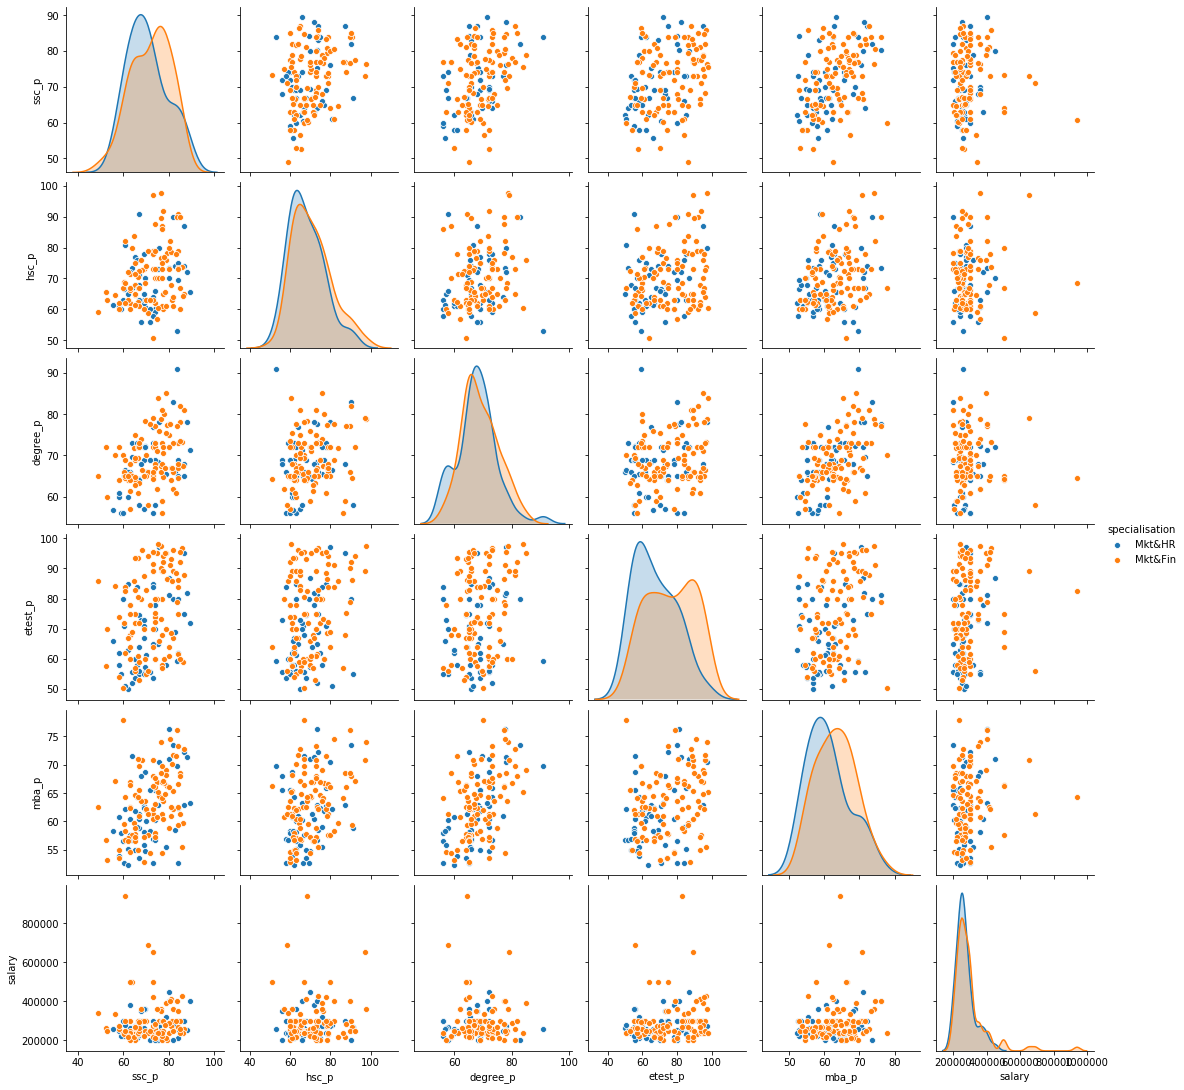

In [38]:
sns.pairplot(df_placed, kind="scatter", hue="specialisation")
plt.show()